In [75]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("talk")
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import MaxAbsScaler, Normalizer, StandardScaler, RobustScaler
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ConfusionMatrix

%matplotlib inline

In [62]:
df = pd.read_pickle('df_ready1')

In [63]:
df['target'] = 0

In [64]:
# Setting mock federal standard for a highschool grad rate of at least 90%
df.loc[df['High school graduation raw value'] >= 0.9, 'target'] = 1  # Meeting standard

df.loc[df['High school graduation raw value'] <0.9, 'target'] = 0  # Failing to meet standard


In [65]:
df['target'].value_counts().sort_index()

0    1496
1    1318
Name: target, dtype: int64

In [66]:
(df.corr() > 0.7).sum()

Poor or fair health raw value                                           8
Poor physical health days raw value                                     8
Poor mental health days raw value                                       6
Adult smoking raw value                                                 7
Adult obesity raw value                                                 1
Food environment index raw value                                        1
Physical inactivity raw value                                           2
Access to exercise opportunities raw value                              1
Excessive drinking raw value                                            1
Alcohol-impaired driving deaths raw value                               1
Uninsured raw value                                                     3
Dentists raw value                                                      1
Preventable hospital stays raw value                                    1
Mammography screening raw value       

In [67]:
drop = ['Poor physical health days raw value', 'Poor mental health days raw value',
        'Adult smoking raw value', 'Children in poverty raw value', 
        'Premature age-adjusted mortality raw value',
        'Frequent physical distress raw value', 'Frequent mental distress raw value']

df_3_max_corr = df.drop(drop, axis=1)

In [68]:
(df_3_max_corr.corr() > 0.7).sum()

Poor or fair health raw value                                           1
Adult obesity raw value                                                 1
Food environment index raw value                                        1
Physical inactivity raw value                                           2
Access to exercise opportunities raw value                              1
Excessive drinking raw value                                            1
Alcohol-impaired driving deaths raw value                               1
Uninsured raw value                                                     3
Dentists raw value                                                      1
Preventable hospital stays raw value                                    1
Mammography screening raw value                                         1
Flu vaccinations raw value                                              1
High school graduation raw value                                        2
Some college raw value                

In [69]:
more_to_drop = ['Physical inactivity raw value', 'Uninsured raw value', 'High school graduation raw value',
                'Severe housing problems raw value', 'Percentage of households with high housing costs',
                'Diabetes prevalence raw value', 'Uninsured adults raw value',
                'Uninsured children raw value', 'Severe housing cost burden raw value',
                '% Hispanic raw value', '% not proficient in English raw value' ]

df_1_max_corr = df_3_max_corr.drop(columns=more_to_drop, axis=1)

In [70]:
(df_1_max_corr.corr() > 0.7).sum()

Poor or fair health raw value                                           1
Adult obesity raw value                                                 1
Food environment index raw value                                        1
Access to exercise opportunities raw value                              1
Excessive drinking raw value                                            1
Alcohol-impaired driving deaths raw value                               1
Dentists raw value                                                      1
Preventable hospital stays raw value                                    1
Mammography screening raw value                                         1
Flu vaccinations raw value                                              1
Some college raw value                                                  1
Unemployment raw value                                                  1
Income inequality raw value                                             1
Children in single-parent households r

In [71]:
df_1_max_corr.iloc[:, 5:].head()

,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Adult obesity raw value,Food environment index raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Dentists raw value,Preventable hospital stays raw value,...,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Non-Hispanic white raw value,% Females raw value,% Rural raw value,target
3,1,8824.0571232,0.184111,0.375,7.2,0.686775,0.168780,0.288136,0.000324,6599.0,...,0.239370,0.151196,0.192545,0.004756,0.012792,0.001045,0.744739,0.513422,0.420022,1
4,1,7224.6321603,0.180605,0.310,8.0,0.719710,0.167150,0.318750,0.000499,3833.0,...,0.218485,0.199470,0.089532,0.007760,0.011565,0.000687,0.830474,0.514528,0.422791,0
5,1,9586.165037,0.257734,0.443,5.6,0.536257,0.126987,0.296296,0.000356,4736.0,...,0.207638,0.188247,0.479422,0.006529,0.004630,0.001860,0.459557,0.472299,0.677896,0
6,1,11783.543675,0.199969,0.378,7.6,0.162514,0.159252,0.272727,0.000265,5998.0,...,0.206061,0.160226,0.214576,0.004279,0.002206,0.001147,0.742986,0.464531,0.683526,0
7,1,10908.101822,0.210953,0.344,8.5,0.229493,0.153787,0.218750,0.000207,4162.0,...,0.233499,0.178426,0.014600,0.006326,0.003017,0.001172,0.869443,0.506886,0.899515,1


# PCA Analysis

In [89]:
df_1_max_corr.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Adult obesity raw value,Food environment index raw value,...,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Non-Hispanic white raw value,% Females raw value,% Rural raw value,target
3,01,001,01001,AL,Autauga County,1,8824.0571232,0.184111,0.375,7.2,...,0.239370,0.151196,0.192545,0.004756,0.012792,0.001045,0.744739,0.513422,0.420022,1
4,01,003,01003,AL,Baldwin County,1,7224.6321603,0.180605,0.310,8.0,...,0.218485,0.199470,0.089532,0.007760,0.011565,0.000687,0.830474,0.514528,0.422791,0
5,01,005,01005,AL,Barbour County,1,9586.165037,0.257734,0.443,5.6,...,0.207638,0.188247,0.479422,0.006529,0.004630,0.001860,0.459557,0.472299,0.677896,0
6,01,007,01007,AL,Bibb County,1,11783.543675,0.199969,0.378,7.6,...,0.206061,0.160226,0.214576,0.004279,0.002206,0.001147,0.742986,0.464531,0.683526,0
7,01,009,01009,AL,Blount County,1,10908.101822,0.210953,0.344,8.5,...,0.233499,0.178426,0.014600,0.006326,0.003017,0.001172,0.869443,0.506886,0.899515,1


# PCA scaled properly

In [90]:
# Did not scale before eveything. Leaving the results from not scaling below.

X_pca_strict = df_1_max_corr.drop(columns='target', axis=1)
X_pca = X_pca_strict.iloc[:, 5:]
y_pca = df_1_max_corr['target']
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_pca)

standard = StandardScaler()
X_pca_train = standard.fit_transform(X_pca_train)
X_pca_test = standard.fit_transform(X_pca_test)
X_pca_all = standard.fit_transform(X_pca)

pca = PCA(n_components=5)
df_pca_strict = pca.fit_transform(X_pca_all)
y = df_1_max_corr['target']

In [91]:
pca.explained_variance_ratio_.cumsum()

array([0.23636822, 0.36095026, 0.44414538, 0.50535363, 0.55124526])

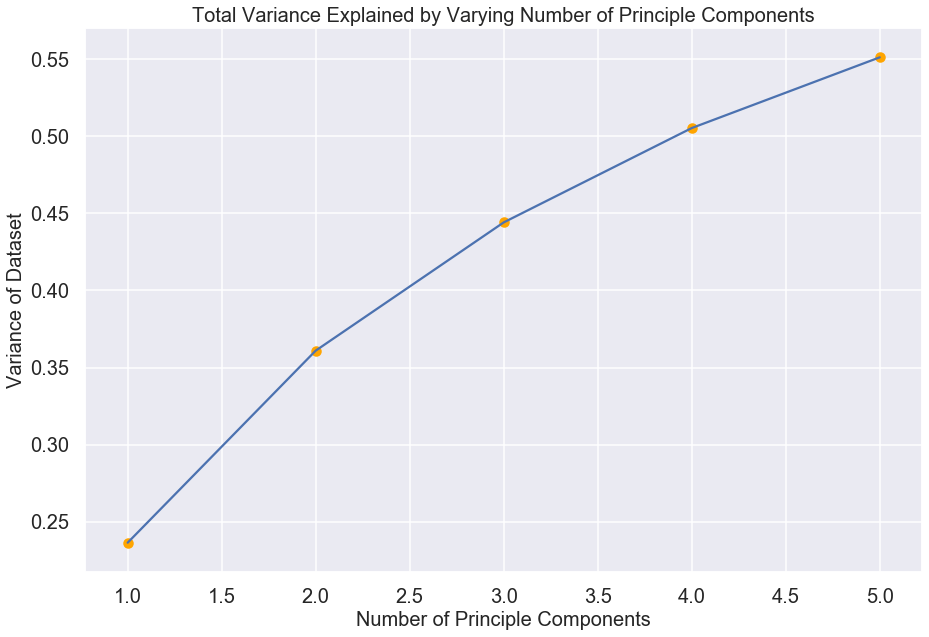

In [191]:
plt.figure(figsize=(15,10))
plt.plot(range(1, len(pca.explained_variance_ratio_.cumsum())+1), 
               pca.explained_variance_ratio_.cumsum())

plt.scatter(range(1, len(pca.explained_variance_ratio_.cumsum())+1), 
                  pca.explained_variance_ratio_.cumsum(), c='orange')

plt.title('Total Variance Explained by Varying Number of Principle Components', fontsize=20);
plt.xlabel('Number of Principle Components', fontsize=20)
plt.ylabel('Variance of Dataset', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('PCA_variance_vs_components.png')

In [127]:
dataFrame = pd.DataFrame(X_pca_all)
PC1 = dataFrame[1].values
PC2 = dataFrame[2].values

In [125]:
y_pca_values = y_pca.values

In [135]:
pca_df_plot = pd.DataFrame([PC1, PC2, y_pca_values]).T
pca_df_plot['target'] = pca_df_plot.iloc[:, 2].astype('int')

In [138]:
pca_df_plot.drop(columns=2,inplace=True)


In [139]:
pca_df_plot.columns = ['PC1', 'PC2', 'target']

In [143]:
pca_df_plot.head()

,PC1,PC2,target
0,0.166265,0.194733,1
1,-0.470787,0.118620,0
2,0.469813,1.792748,0
3,1.345031,0.538935,0
4,0.996342,0.777349,1


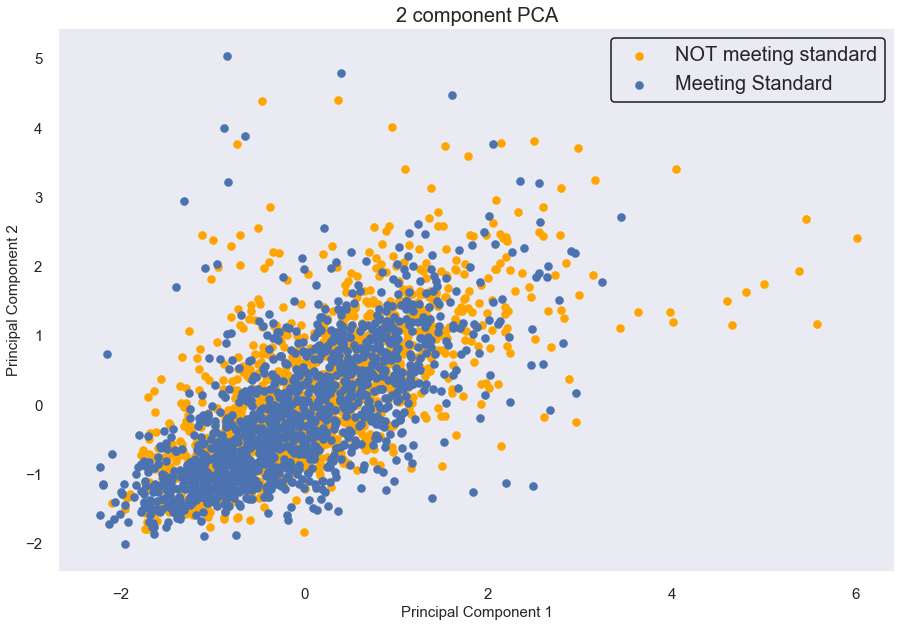

In [193]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
targets = [0, 1]
labels = ['NOT meeting standard', 'Meeting Standard']
colors = ['orange', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = pca_df_plot['target'] == target
    ax.scatter(pca_df_plot.loc[indicesToKeep, 'PC1']
               , pca_df_plot.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(labels, fontsize=20, frameon=True, framealpha=1, edgecolor='k')
ax.grid()
plt.savefig('2D_graph_PC1_PC2.png')

Accuracy:0.7116477272727273
F1: 0.687211093990755
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       374
           1       0.70      0.68      0.69       330

    accuracy                           0.71       704
   macro avg       0.71      0.71      0.71       704
weighted avg       0.71      0.71      0.71       704

[0.6664058660048423, 0.6371547756041427, 0.6890432254930732, 0.6692101168968742, 0.7025911335304337, 0.6936522307925451, 0.7112935731671914, 0.7111024844720499, 0.7196672406961505]


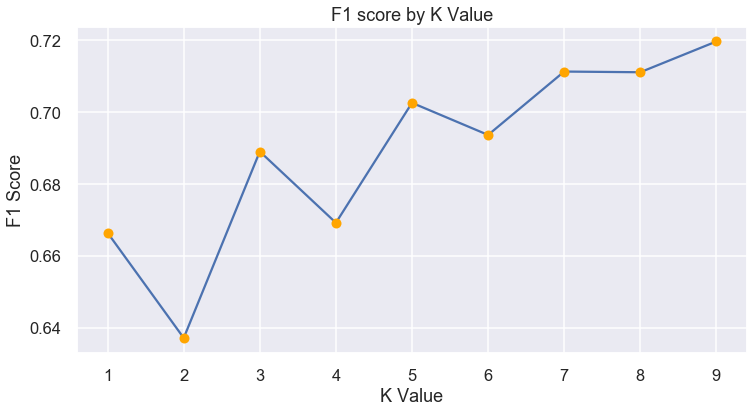

In [202]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_pca_train, y_pca_train)
y_pred_knn = knn.predict(X_pca_test)
y_pred_knn

print('Accuracy:' + str(accuracy_score(y_pca_test, y_pred_knn)))
print('F1: ' + str(f1_score(y_pca_test, y_pred_knn)))
print(classification_report(y_pca_test, y_pred_knn))


#to find optimal k
k_range = list(range(1, 10))
k_scores = []

for k in k_range:
   knn = KNeighborsClassifier(n_neighbors=k)
   knn.fit(X_pca_train, y_pca_train)
   y_predict = knn.predict(X_pca_test)
   score = f1_score(y_pca_test, y_predict, average='weighted')
   k_scores.append( score)
print(k_scores)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(k_range, k_scores, linestyle='solid', marker='o',
        markerfacecolor='orange', markersize=10)
plt.title('F1 score by K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')
plt.savefig('F1_vs_k_knn.png')
plt.show()


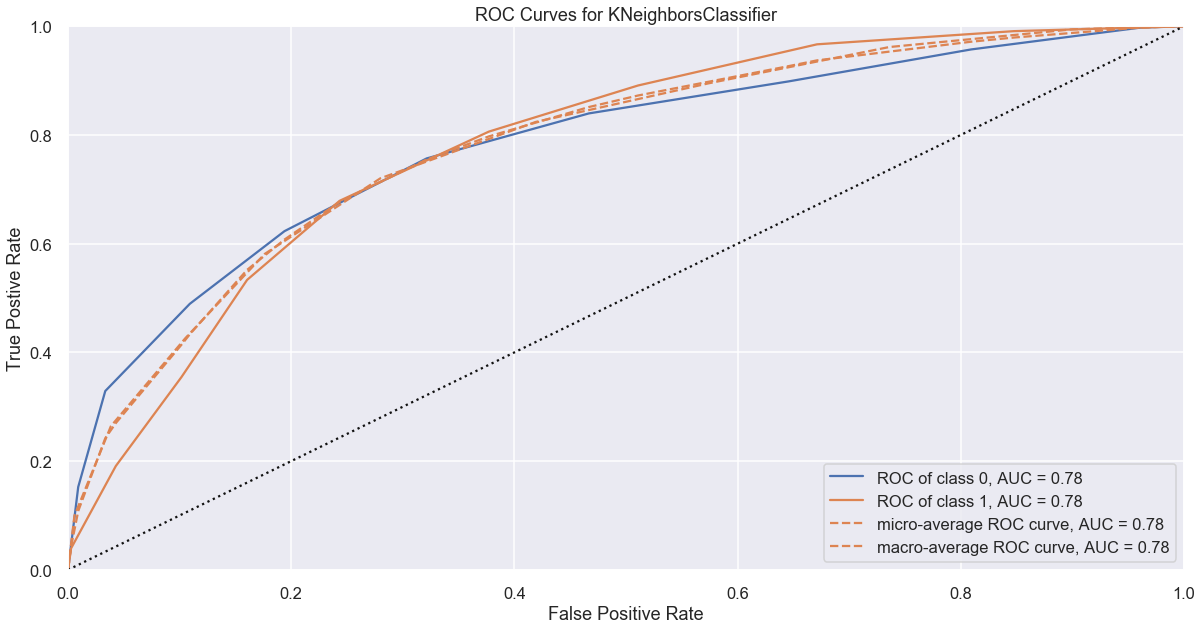

In [205]:
plt.figure(figsize=(20,10))
visualizer = ROCAUC(knn)
visualizer.score(X_pca_test, y_pca_test)  # Evaluate the model on the test data
plt.savefig('ROC_curve_knn.png')
plt.title('ROC Curves for KNN Classifier')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
visualizer.poof() 


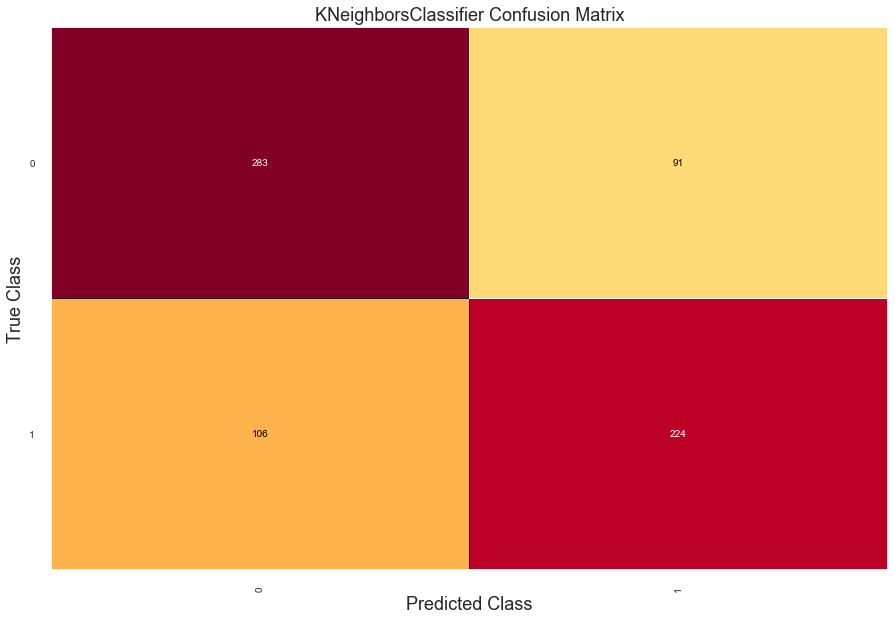

In [204]:
plt.figure(figsize = (15,10))
cm = ConfusionMatrix(knn)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_pca_test, y_pca_test)

# How did we do?
plt.savefig('confusion_matrix_knn.png')
cm.poof()


In [208]:
#Support Vector Machine Classification
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_pca_train, y_pca_train)
y_pred = svclassifier.predict(X_pca_test)
print('Accuracy:' + str(accuracy_score(y_pca_test, y_pred)))
print('F1: ' + str(f1_score(y_pca_test, y_pred)))
print(classification_report(y_pca_test, y_pred))

Accuracy:0.7215909090909091
F1: 0.7074626865671643
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       374
           1       0.70      0.72      0.71       330

    accuracy                           0.72       704
   macro avg       0.72      0.72      0.72       704
weighted avg       0.72      0.72      0.72       704



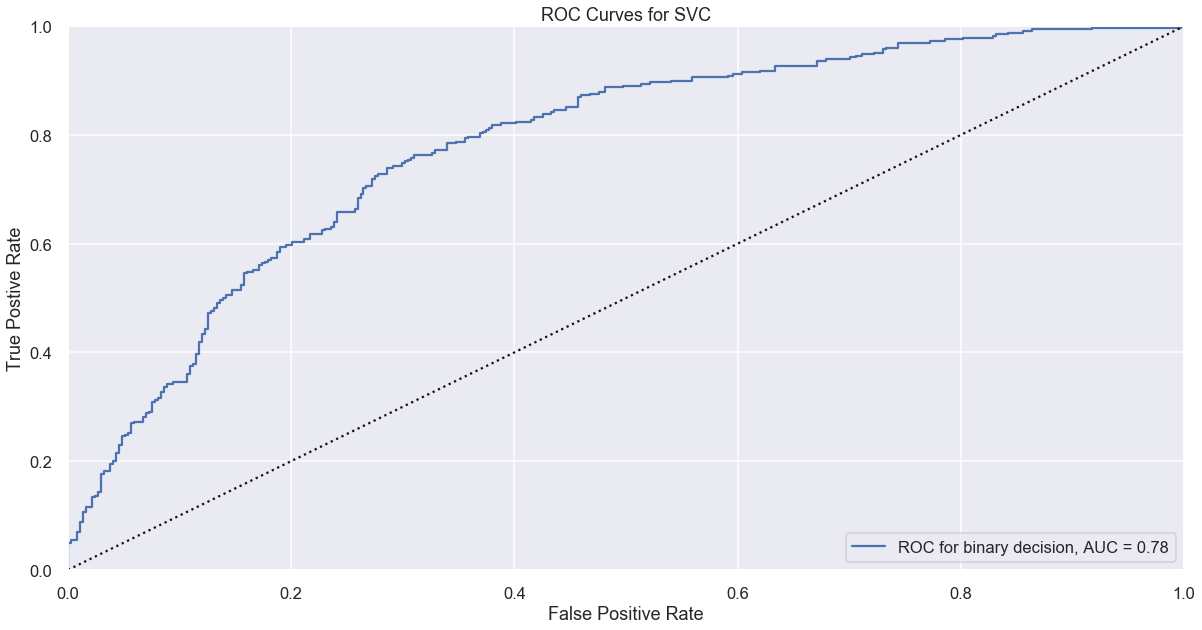

<Figure size 432x288 with 0 Axes>

In [197]:
plt.figure(figsize=(20,10))
visualizer = ROCAUC(svclassifier, micro=False, macro=False, per_class=False,)
visualizer.score(X_pca_test, y_pca_test)  # Evaluate the model on the test data

visualizer.poof() 
plt.savefig('ROC_svm.png')

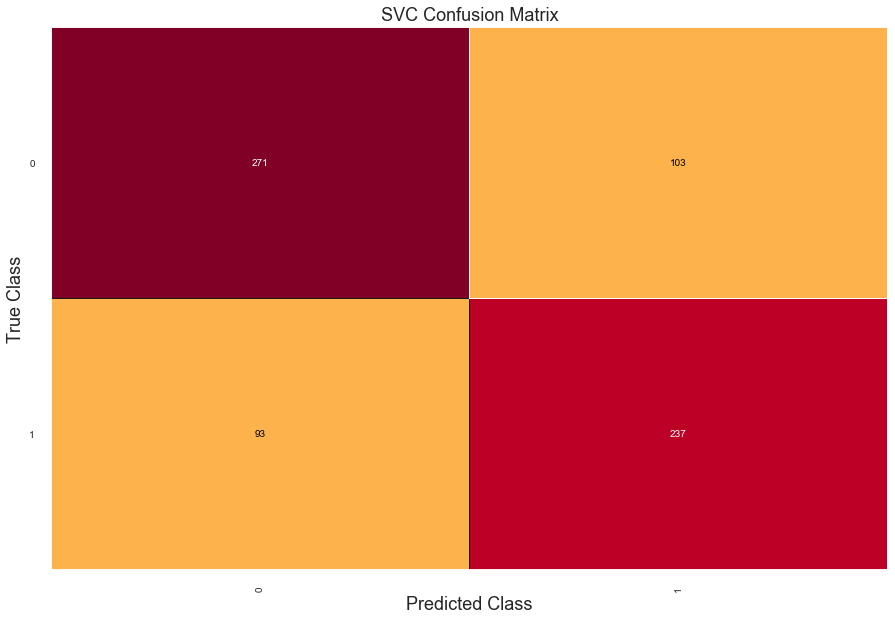

<Figure size 432x288 with 0 Axes>

In [198]:
plt.figure(figsize = (15,10))
cm = ConfusionMatrix(svclassifier)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_pca_test, y_pca_test)

# How did we do?
cm.poof()
plt.savefig('confusion_matrix_svm.png')

# PCA not scaled properly, but good scores

In [72]:
# Making PC's from these data frames to try on the model
# Will call the data frame with 1 max correlation of 0.7 or above
# df_pca_strict
# The other, which allows for 3 variables to correlate greater than 0.7 will
# be called df_pca_less_strict
X_pca_strict = df_1_max_corr.drop(columns='target', axis=1)
y_pca = df_1_max_corr['target']

X_pca = X_pca_strict.iloc[:, 5:]
pca = PCA(n_components=5)
df_pca_strict = pca.fit_transform(X_pca)
y = df_1_max_corr['target']

In [73]:
pca.explained_variance_ratio_.cumsum()

array([0.99857028, 0.99994948, 0.99998291, 1.        , 1.        ])

(array([0.9875, 0.99  , 0.9925, 0.995 , 0.9975, 1.    , 1.0025, 1.005 ,
        1.0075, 1.01  ]), <a list of 10 Text yticklabel objects>)

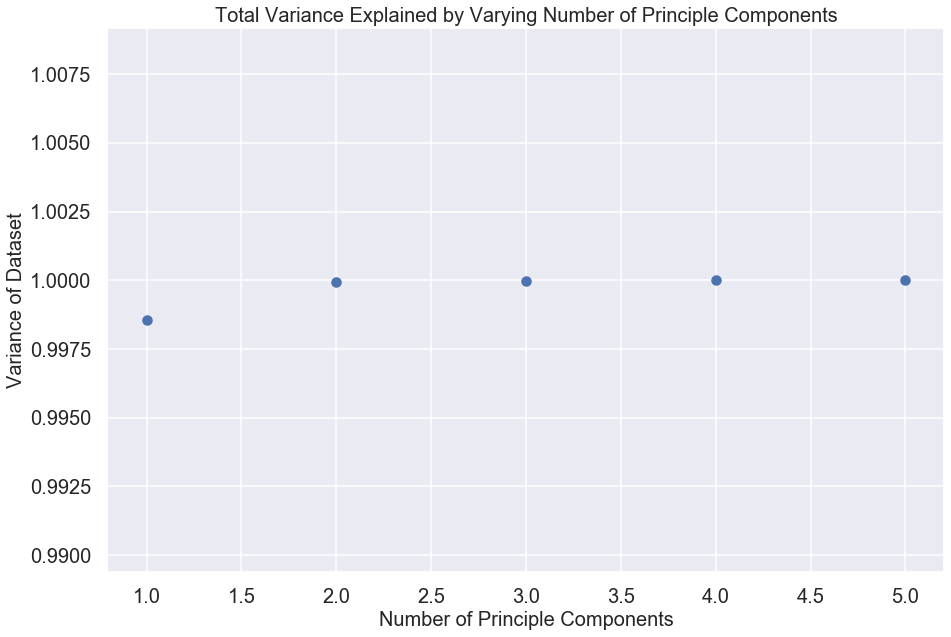

In [78]:
plt.figure(figsize=(15,10))
plt.scatter(range(1, len(pca.explained_variance_ratio_.cumsum())+1), pca.explained_variance_ratio_.cumsum())
plt.title('Total Variance Explained by Varying Number of Principle Components', fontsize=20);
plt.xlabel('Number of Principle Components', fontsize=20)
plt.ylabel('Variance of Dataset', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [18]:
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, random_state=10, test_size = 0.2)

In [19]:
standard = StandardScaler()
X_pca_train = standard.fit_transform(X_pca_train)
X_pca_test = standard.fit_transform(X_pca_test)


Accuracy:0.7122557726465364
F1: 0.6943396226415093
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       295
           1       0.70      0.69      0.69       268

    accuracy                           0.71       563
   macro avg       0.71      0.71      0.71       563
weighted avg       0.71      0.71      0.71       563

[0.6838365896980462, 0.6678587808675619, 0.7120754087203113, 0.6810347249783785, 0.7022900319259882, 0.6758975121613678, 0.7059883443665694, 0.6937913101523678, 0.7113964526131388]


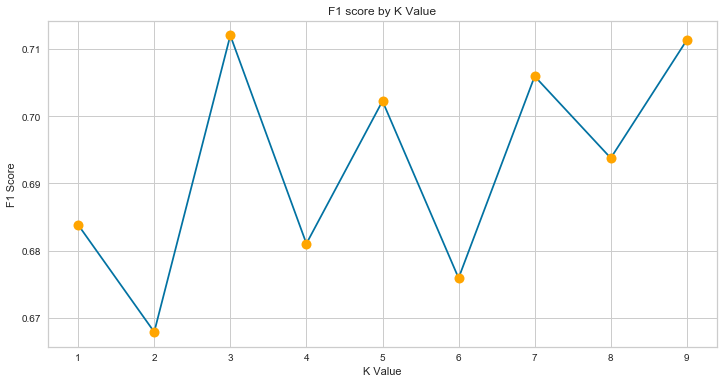

In [20]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_pca_train, y_train)
y_pred_knn = knn.predict(X_pca_test)
y_pred_knn

print('Accuracy:' + str(accuracy_score(y_test, y_pred_knn)))
print('F1: ' + str(f1_score(y_test, y_pred_knn)))
print(classification_report(y_test, y_pred_knn))


#to find optimal k
k_range = list(range(1, 10))
k_scores = []

for k in k_range:
   knn = KNeighborsClassifier(n_neighbors=k)
   knn.fit(X_pca_train, y_train)
   y_predict = knn.predict(X_pca_test)
   score = f1_score(y_test, y_predict, average='weighted')
   k_scores.append( score)
print(k_scores)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(k_range, k_scores, linestyle='solid', marker='o',
        markerfacecolor='orange', markersize=10)
plt.title('F1 score by K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')
plt.show()

In [21]:
#Support Vector Machine Classification
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_pca_train, y_train)
y_pred = svclassifier.predict(X_pca_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'The accuracy score is {accuracy_score(y_test, y_pred)}')

[[210  85]
 [ 70 198]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       295
           1       0.70      0.74      0.72       268

    accuracy                           0.72       563
   macro avg       0.72      0.73      0.72       563
weighted avg       0.73      0.72      0.72       563

The accuracy score is 0.7246891651865008


In [79]:
# Again, but for df_pca_less_strict
X_pca_strict = df_3_max_corr.drop(columns='target', axis=1)
X_pca = X_pca_strict.iloc[:, 5:]
pca = PCA(n_components=5)
df_pca_strict = pca.fit_transform(X_pca)
y = df_3_max_corr['target']

(array([0.9875, 0.99  , 0.9925, 0.995 , 0.9975, 1.    , 1.0025, 1.005 ,
        1.0075, 1.01  ]), <a list of 10 Text yticklabel objects>)

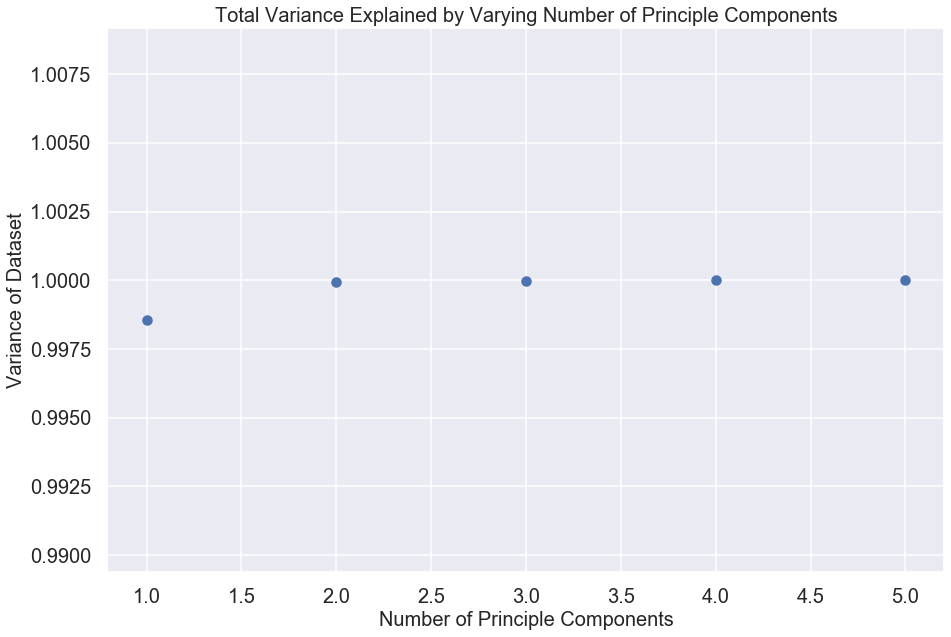

In [80]:
plt.figure(figsize=(15,10))
plt.scatter(range(1, len(pca.explained_variance_ratio_.cumsum())+1), pca.explained_variance_ratio_.cumsum())
plt.title('Total Variance Explained by Varying Number of Principle Components', fontsize=20);
plt.xlabel('Number of Principle Components', fontsize=20)
plt.ylabel('Variance of Dataset', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [81]:
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, random_state=10, test_size = 0.2)

In [82]:
standard = StandardScaler()
X_pca_train = standard.fit_transform(X_pca_train)
X_pca_test = standard.fit_transform(X_pca_test)


Accuracy:0.8010657193605684
F1: 0.787878787878788
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       295
           1       0.80      0.78      0.79       268

    accuracy                           0.80       563
   macro avg       0.80      0.80      0.80       563
weighted avg       0.80      0.80      0.80       563

[0.7477797513321492, 0.740713093409274, 0.786940973864835, 0.7754960968106397, 0.7956336803117952, 0.77842487153539, 0.7902226612165604, 0.7768262152118453, 0.8008893055614812]


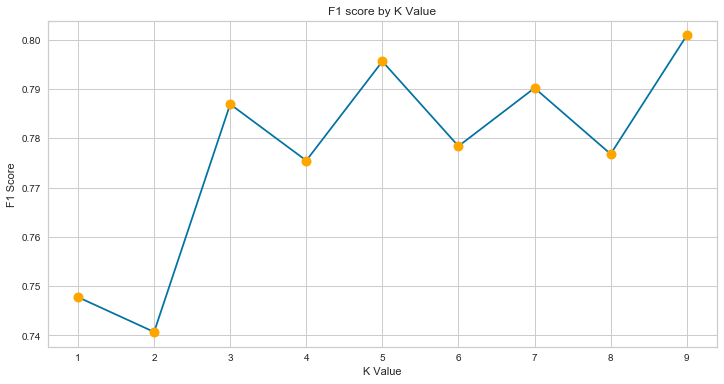

In [34]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_pca_train, y_train)
y_pred_knn = knn.predict(X_pca_test)
y_pred_knn

print('Accuracy:' + str(accuracy_score(y_test, y_pred_knn)))
print('F1: ' + str(f1_score(y_test, y_pred_knn)))
print(classification_report(y_test, y_pred_knn))


#to find optimal k
k_range = list(range(1, 10))
k_scores = []

for k in k_range:
   knn = KNeighborsClassifier(n_neighbors=k)
   knn.fit(X_pca_train, y_train)
   y_predict = knn.predict(X_pca_test)
   score = f1_score(y_test, y_predict, average='weighted')
   k_scores.append( score)
print(k_scores)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(k_range, k_scores, linestyle='solid', marker='o',
        markerfacecolor='orange', markersize=10)
plt.title('F1 score by K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')
plt.show()

In [35]:
#Support Vector Machine Classification
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_pca_train, y_train)
y_pred = svclassifier.predict(X_pca_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'The accuracy score is {accuracy_score(y_test, y_pred)}')

[[290   5]
 [  8 260]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       295
           1       0.98      0.97      0.98       268

    accuracy                           0.98       563
   macro avg       0.98      0.98      0.98       563
weighted avg       0.98      0.98      0.98       563

The accuracy score is 0.9769094138543517


# Raw Data Analysis

In [22]:
X = df.iloc[:, 6:]

In [23]:
# Making features and target
X.drop(columns=['High school graduation raw value', 'target'], inplace=True)
X = X.values
y = df['target'].values

In [24]:
# train, test, split variables
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)

In [25]:
standard = StandardScaler()
X_train_scaled = standard.fit_transform(X_train)
X_test_scaled = standard.fit_transform(X_test)
X_scaled = standard.fit_transform(X)

In [26]:
#Support Vector Machine Classification
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'The accuracy score is {accuracy_score(y_test, y_pred)}')

[[207  88]
 [150 118]]
              precision    recall  f1-score   support

           0       0.58      0.70      0.63       295
           1       0.57      0.44      0.50       268

    accuracy                           0.58       563
   macro avg       0.58      0.57      0.57       563
weighted avg       0.58      0.58      0.57       563

The accuracy score is 0.5772646536412078


Accuracy:0.5452930728241563
F1: 0.5259259259259259
              precision    recall  f1-score   support

           0       0.57      0.56      0.56       295
           1       0.52      0.53      0.53       268

    accuracy                           0.55       563
   macro avg       0.54      0.54      0.54       563
weighted avg       0.55      0.55      0.55       563

[0.5757243592387007, 0.5139896857455788, 0.5454252717790931, 0.5357604487480708, 0.5645033133604667, 0.5477107246643635, 0.576769051365692, 0.5695113558931084, 0.5722514009232115]


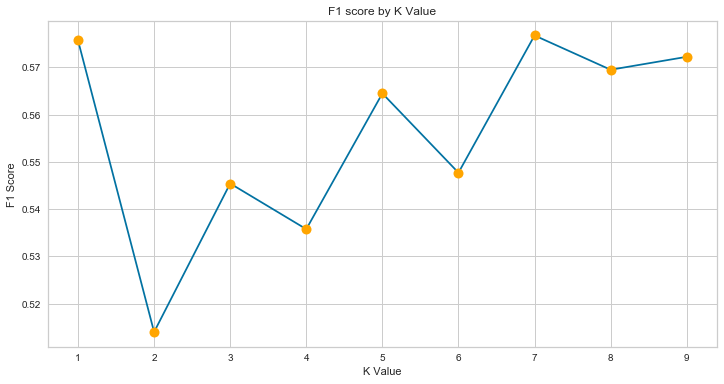

In [27]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn

print('Accuracy:' + str(accuracy_score(y_test, y_pred_knn)))
print('F1: ' + str(f1_score(y_test, y_pred_knn)))
print(classification_report(y_test, y_pred_knn))


#to find optimal k
k_range = list(range(1, 10))
k_scores = []

for k in k_range:
   knn = KNeighborsClassifier(n_neighbors=k)
   knn.fit(X_train, y_train)
   y_predict = knn.predict(X_test)
   score = f1_score(y_test, y_predict, average='weighted')
   k_scores.append( score)
print(k_scores)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(k_range, k_scores, linestyle='solid', marker='o',
        markerfacecolor='orange', markersize=10)
plt.title('F1 score by K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')
plt.show()

In [ ]:
# XG BOOST
import xgboost as xgb
xgc_scores = {}
xgc_feature_sets = []
k=0
for i in range(0, 100, 10):
    for j in range(0, 100, 10):
        xgc = xgb.XGBClassifier(reg_alpha=i, reg_lambda=j)
        xgc.fit(X_train_scaled, y_train)

        
        xgc_features = pd.merge(pd.DataFrame(xgc.feature_importances_, 
                     index=X.iloc[:, 2:].columns, 
                     columns=["importance"]
                    ).sort_values(by="importance", ascending=False), var_description, how="left",
                                right_index=True, left_index=True)
        xgc_scores[k] = [i,
                         j,
                         xgc.score(X_train_scaled, y_train),
                         xgc.score(X_test_scaled, y_test),
                         np.sum(xgc_features.importance>0)]
        xgc_feature_sets.append(xgc_features)
        k += 1